# Analysis and Prediction on IPL matches Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\hp\First1\Project\IPL\IPL 2008-2019\matches.csv')
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [4]:
df.shape

(756, 18)

In [5]:
df.drop(['umpire3'],axis=1,inplace=True)

In [6]:
df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [7]:
Teams={
    'Royal Challengers Bangalore':'RCB', 
    'Sunrisers Hyderabad':'SRH',
    'Rising Pune Supergiant':'RPS',
    'Mumbai Indians':'MI',
    'Kolkata Knight Riders':'KKR', 
    'Gujarat Lions':'GL',
    'Kings XI Punjab':'KXIP',
    'Delhi Daredevils':'DD',
    'Chennai Super Kings':'CSK',
    'Rajasthan Royals':'RR',
    'Deccan Chargers':'DC',
    'Kochi Tuskers Kerala':'KTK',
    'Pune Warriors':'PW',
    'Rising Pune Supergiants':'RPS'
}

In [8]:
df['team1']=df['team1'].map(Teams)
df['team2']=df['team2'].map(Teams)
df['toss_winner']=df['toss_winner'].map(Teams)
df['winner']=df['winner'].map(Teams)

In [9]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,IPL-2017,Bangalore,08-04-2017,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


### Some Basic Analysis

In [10]:
print('Total Matches Played:',df.shape[0])
print(' \n Venues Played At:',df['city'].unique())     
print(' \n Teams :',df['team1'].unique())

Total Matches Played: 756
 
 Venues Played At: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']
 
 Teams : ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW'
 nan]


### Count of Player of the matches

In [11]:
print(df['player_of_match'].value_counts())

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
SB Wagh            1
RA Tripathi        1
B Stanlake         1
Mohammed Shami     1
PD Collingwood     1
Name: player_of_match, Length: 226, dtype: int64


### Maximum win by runs

In [12]:
df[df['win_by_runs']==df['win_by_runs'].max()]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,IPL-2017,Delhi,06-05-2017,MI,DD,DD,field,normal,0,MI,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan


##### Mumbai Indians(MI) defeated Delhi Daredevils(DD) with the highest run difference

### Highest wins by wickets

In [13]:
df[df['win_by_wickets']==df['win_by_wickets'].max()]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
2,3,IPL-2017,Rajkot,07-04-2017,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
34,35,IPL-2017,Chandigarh,30-04-2017,DD,KXIP,KXIP,field,normal,0,KXIP,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan
71,72,IPL-2008,Mumbai,27-04-2008,MI,DC,DC,field,normal,0,DC,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri
119,120,IPL-2009,Cape Town,19-04-2009,KXIP,DD,DD,field,normal,1,DD,0,10,DL Vettori,Newlands,MR Benson,SD Ranade
183,184,IPL-2010,Bangalore,18-03-2010,RR,RCB,RCB,field,normal,0,RCB,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper
298,299,IPL-2011,Mumbai,20-05-2011,MI,RR,MI,bat,normal,0,RR,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel
376,377,IPL-2012,Jaipur,20-05-2012,RR,MI,RR,bat,normal,0,MI,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin
390,391,IPL-2013,Chandigarh,10-04-2013,KXIP,CSK,CSK,field,normal,0,CSK,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin
542,543,IPL-2015,Delhi,26-04-2015,DD,RCB,RCB,field,normal,0,RCB,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi
590,591,IPL-2016,Rajkot,21-04-2016,GL,SRH,SRH,field,normal,0,SRH,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena


### Maximum Toss Winners

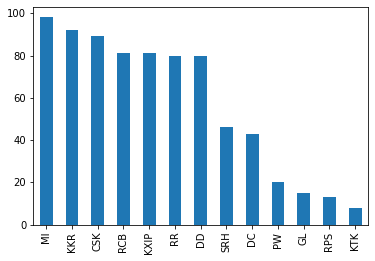

In [14]:
df['toss_winner'].value_counts().plot.bar()

##### Highest Toss winner is MI

In [15]:
matches_played_byteams=pd.concat([df['team1'],df['team2']],axis=1)
matches_played_byteams

,team1,team2
0,SRH,RCB
1,MI,RPS
2,GL,KKR
3,RPS,KXIP
4,RCB,DD
...,...,...
751,KKR,MI
752,CSK,MI
753,SRH,NaN
754,NaN,CSK


In [16]:
teams=(matches_played_byteams['team1'].value_counts() + matches_played_byteams['team2'].value_counts()).reset_index()
teams.columns=['team_name','Matches_played']
teams

,team_name,Matches_played
0,CSK,164
1,DC,75
2,DD,161
3,GL,30
4,KKR,178
5,KTK,14
6,KXIP,176
7,MI,187
8,PW,46
9,RCB,180


In [17]:
wins=pd.DataFrame(df['winner'].value_counts()).reset_index()
wins.columns=['team_name','wins']
wins

,team_name,wins
0,MI,109
1,CSK,100
2,KKR,92
3,RCB,84
4,KXIP,82
5,RR,75
6,DD,67
7,SRH,58
8,DC,29
9,RPS,15


In [18]:
player=teams.merge(wins,left_on='team_name',right_on='team_name',how='inner')

In [19]:
player.columns=['team','matches_played','wins']
player

,team,matches_played,wins
0,CSK,164,100
1,DC,75,29
2,DD,161,67
3,GL,30,13
4,KKR,178,92
5,KTK,14,6
6,KXIP,176,82
7,MI,187,109
8,PW,46,12
9,RCB,180,84


In [20]:
player['win%']=(player['wins']/player['matches_played'])*100
player

,team,matches_played,wins,win%
0,CSK,164,100,60.975610
1,DC,75,29,38.666667
2,DD,161,67,41.614907
3,GL,30,13,43.333333
4,KKR,178,92,51.685393
5,KTK,14,6,42.857143
6,KXIP,176,82,46.590909
7,MI,187,109,58.288770
8,PW,46,12,26.086957
9,RCB,180,84,46.666667


In [21]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [22]:
trace1 = go.Bar(
    x=player['team'],
    y=player['matches_played'],
    name='Total Matches'
)
trace2 = go.Bar(
    x=player.team,
    y=player['wins'],
    name='Matches Won'
)

In [23]:
data = [trace1, trace2]
py.iplot(data)

### Matches played across each season

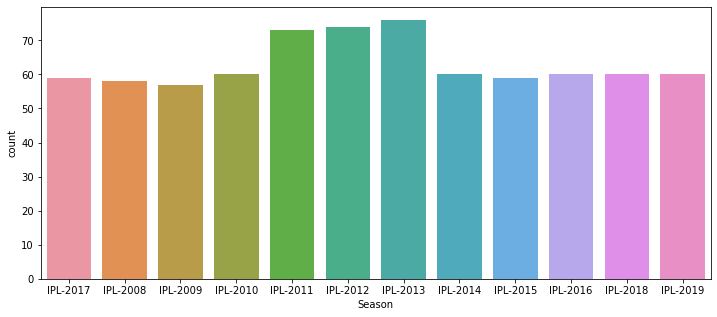

In [24]:
plt.figure(figsize=(12, 5))
sns.countplot(df['Season'])

In [25]:
df2=pd.read_csv(r'C:\Users\hp\First1\Project\IPL\IPL 2008-2019/deliveries.csv')
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [26]:
season=df[['id','Season']].merge(df2, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season

,Season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,IPL-2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,IPL-2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,IPL-2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,IPL-2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,IPL-2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,IPL-2019,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,IPL-2019,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,IPL-2019,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,IPL-2019,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,...,0,0,0,0,2,0,2,NaN,NaN,NaN


### Runs Across the Seasons

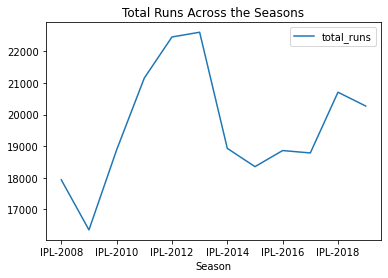

In [27]:
season=season.groupby(['Season'])['total_runs'].sum().reset_index()
season.set_index('Season').plot()
plt.title('Total Runs Across the Seasons')
plt.show()

##### There was a decline in total runs from 2008 to 2009.But there after there was a  increase in runs in every season until 2013, but from next season there was a slump in the total runs. But the number of matches are not equal in all seasons. We should check the average runs per match in each season

In [28]:
avg_runs=df.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'matches'})
avg_runs

,Season,matches
0,IPL-2008,58
1,IPL-2009,57
2,IPL-2010,60
3,IPL-2011,73
4,IPL-2012,74
5,IPL-2013,76
6,IPL-2014,60
7,IPL-2015,59
8,IPL-2016,60
9,IPL-2017,59


In [29]:
season

,Season,total_runs
0,IPL-2008,17937
1,IPL-2009,16353
2,IPL-2010,18883
3,IPL-2011,21154
4,IPL-2012,22453
5,IPL-2013,22602
6,IPL-2014,18931
7,IPL-2015,18353
8,IPL-2016,18862
9,IPL-2017,18786


In [30]:
final=pd.concat([avg_runs,season.iloc[:,1]],axis=1)
final

,Season,matches,total_runs
0,IPL-2008,58,17937
1,IPL-2009,57,16353
2,IPL-2010,60,18883
3,IPL-2011,73,21154
4,IPL-2012,74,22453
5,IPL-2013,76,22602
6,IPL-2014,60,18931
7,IPL-2015,59,18353
8,IPL-2016,60,18862
9,IPL-2017,59,18786


In [31]:
final['per_match_runs']=final['total_runs']/final['matches']
final.set_index('Season',inplace=True)

In [32]:
final

,matches,total_runs,per_match_runs
Season,,,
IPL-2008,58,17937,309.258621
IPL-2009,57,16353,286.894737
IPL-2010,60,18883,314.716667
IPL-2011,73,21154,289.780822
IPL-2012,74,22453,303.418919
IPL-2013,76,22602,297.394737
IPL-2014,60,18931,315.516667
IPL-2015,59,18353,311.067797
IPL-2016,60,18862,314.366667


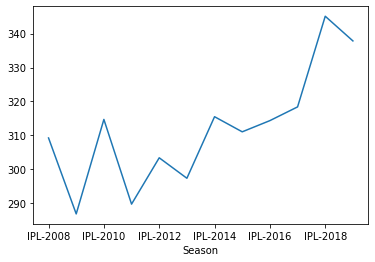

In [33]:
final['per_match_runs'].plot()

### Most lucky grounds for teams

In [34]:
def lucky(df,team_name):
    return df[df['winner']==team_name]['venue'].value_counts().nlargest(5)

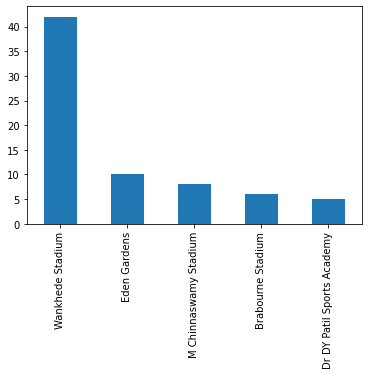

In [35]:
lucky(df,'MI').plot(kind='bar')

### Comparison between 2 teams on the basis of their wins

In [36]:
def comparison(team1,team2):
    compare=df[((df['team1']==team1)|(df['team2']==team1))&((df['team1']==team2)|(df['team2']==team2))]
    sns.countplot(x='Season', hue='winner',data=compare)

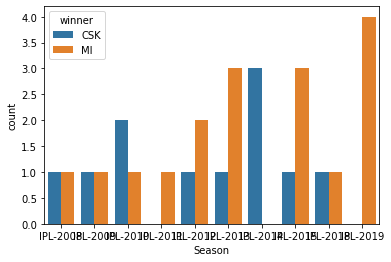

In [37]:
comparison('MI','CSK')

#### Here we can see that MI and CSK have played against each other in more than 2 matches, and MI dominates

## Droping some columns  

In [38]:
df=df[['team1','team2','city','toss_winner','toss_decision','venue','winner']]

## Converting strings into integer for the Prediction

In [39]:
team_encode={
    'MI' : 1,
    'KKR' : 2,
    'RCB' : 3,
    'DC' : 4,
    'CSK' : 5,
    'RR' : 6,
    'DD' : 7,
    'GL' : 8,
    'KXIP' : 9,
    'SRH' : 10,
    'RPS' : 11,
    'KTK' : 12,
    'PW' : 13,
    'Delhi Capitals' : 14,
    'Draw' : 15
}

In [40]:
team_dict={
    'team1':team_encode,
    'team2':team_encode,
    'toss_winner':team_encode,
    'winner':team_encode
}

df.replace(team_dict,inplace=True)
df.head()

,team1,team2,city,toss_winner,toss_decision,venue,winner
0,10.0,3.0,Hyderabad,3.0,field,"Rajiv Gandhi International Stadium, Uppal",10.0
1,1.0,11.0,Pune,11.0,field,Maharashtra Cricket Association Stadium,11.0
2,8.0,2.0,Rajkot,2.0,field,Saurashtra Cricket Association Stadium,2.0
3,11.0,9.0,Indore,9.0,field,Holkar Cricket Stadium,9.0
4,3.0,7.0,Bangalore,3.0,bat,M Chinnaswamy Stadium,3.0


In [41]:
df.isnull().sum()

team1             6
team2            10
city              7
toss_winner      10
toss_decision     0
venue             0
winner           14
dtype: int64

In [42]:
df=df.dropna()

In [43]:
df.isnull().sum()

team1            0
team2            0
city             0
toss_winner      0
toss_decision    0
venue            0
winner           0
dtype: int64

# Machine Learning

In [44]:
from sklearn.preprocessing import LabelEncoder
ftr_list=['city','toss_decision','venue']
lr=LabelEncoder()

for ftr in ftr_list:
    df[ftr]=lr.fit_transform(df[ftr]) #it gives the continous integers to the strings
    print(lr.classes_)
df.head()

['Abu Dhabi' 'Ahmedabad' 'Bangalore' 'Bengaluru' 'Bloemfontein'
 'Cape Town' 'Centurion' 'Chandigarh' 'Chennai' 'Cuttack' 'Delhi'
 'Dharamsala' 'Durban' 'East London' 'Hyderabad' 'Indore' 'Jaipur'
 'Johannesburg' 'Kanpur' 'Kimberley' 'Kochi' 'Kolkata' 'Mohali' 'Mumbai'
 'Nagpur' 'Port Elizabeth' 'Pune' 'Raipur' 'Rajkot' 'Ranchi' 'Sharjah'
 'Visakhapatnam']
['bat' 'field']
['Barabati Stadium' 'Brabourne Stadium' 'Buffalo Park'
 'De Beers Diamond Oval' 'Dr DY Patil Sports Academy'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium' 'Eden Gardens'
 'Feroz Shah Kotla' 'Green Park'
 'Himachal Pradesh Cricket Association Stadium' 'Holkar Cricket Stadium'
 'IS Bindra Stadium' 'JSCA International Stadium Complex' 'Kingsmead'
 'M Chinnaswamy Stadium' 'M. A. Chidambaram Stadium'
 'M. Chinnaswamy Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Maharashtra Cricket Association Stadium' 'Nehru Stadium'
 'New Wanderers Stadium' 'Newlands' 'OUTsurance Oval'
 'Punjab Cricket Association IS Bindra Stadi

,team1,team2,city,toss_winner,toss_decision,venue,winner
0,10.0,3.0,14,3.0,1,25,10.0
1,1.0,11.0,26,11.0,1,18,11.0
2,8.0,2.0,28,2.0,1,28,2.0
3,11.0,9.0,15,9.0,1,10,9.0
4,3.0,7.0,2,3.0,0,14,3.0


### Spliting the data into two parts testing and training

In [45]:
from sklearn.model_selection import train_test_split

train_df,test_df=train_test_split(df,test_size=0.2,random_state=5)
print(train_df.shape)
print(test_df.shape)

(583, 7)
(146, 7)


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

def print_model_score(model,data,predictor,target):
    model.fit(data[predictor],np.ravel(data[target]))
    pred=model.predict(data[predictor])
    acc_score=accuracy_score(pred,data[target])
    scores=cross_val_score(model,data[predictor],data[target],scoring='neg_mean_squared_error',cv=5)
    print(acc_score)
    print('Cross-Validation-Scores: {}'.format(np.sqrt(-scores)))
    print(f'Average RMSE : {np.sqrt(-scores).mean()}')

In [47]:
#Random Forest Classifier
model=RandomForestClassifier(n_estimators=100)
print_model_score(model,train_df,pred_var,target_var)

NameError: name 'pred_var' is not defined